In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('voice')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### SPLITTING DATA

In [6]:
cols = [col for col in data.columns.values if col!= 'label']
X = data[[col for col in data.columns.values if col!= 'label']].values
Y = data['label'].values

In [7]:
cols

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=30)

In [9]:
df_X_train = pd.DataFrame(X_train,columns=cols)

In [10]:
df_X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.207709,0.042006,0.206569,0.185752,0.237908,0.052157,2.342107,9.587379,0.883484,0.212289,0.196275,0.207709,0.165952,0.016719,0.275862,0.234131,0.007812,0.546875,0.539062,0.156422
1,0.168149,0.059979,0.168993,0.111791,0.215224,0.103433,1.089375,4.550461,0.938180,0.464072,0.194851,0.168149,0.102813,0.018980,0.231884,0.539601,0.093750,3.703125,3.609375,0.221630
2,0.209332,0.037362,0.207892,0.189337,0.236988,0.047651,2.456892,9.214673,0.835581,0.210176,0.191867,0.209332,0.174137,0.047761,0.279070,1.341922,0.023438,7.523438,7.500000,0.108408
3,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,0.050020,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231
4,0.234240,0.029158,0.234897,0.222990,0.252216,0.029227,2.399104,8.894689,0.804358,0.119550,0.229124,0.234240,0.199392,0.049130,0.274286,1.623047,0.023438,8.648438,8.625000,0.156552


In [11]:
df_y_train = pd.DataFrame(y_train,columns=['label'])

In [12]:
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 1 columns):
label    2217 non-null object
dtypes: object(1)
memory usage: 17.4+ KB


In [13]:
df_y_train.head()

,label
0,female
1,male
2,female
3,female
4,female


### Scaling X_train

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data_t = scaler.fit_transform(df_X_train)

In [15]:
scale_data_df = pd.DataFrame(scale_data_t,columns=cols)

### PCA

In [16]:
cov_mat = np.cov(scale_data_df.T)
# eigen vector, eigen values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Calculation of Explained Variance from the eigen values
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance


In [17]:
list(cum_var_exp)

[45.391259838920526,
 57.45273008023169,
 68.25651641063267,
 75.72531256814219,
 80.84588007690161,
 85.40287845628461,
 88.67986218584169,
 91.64059598047723,
 94.06263284782504,
 95.9830126112441,
 97.61939467583258,
 98.515133652854,
 99.20190993658217,
 99.65776804600702,
 99.89063603991839,
 99.96167714262248,
 100.00000000000001,
 100.00000000000001,
 100.00000000000001,
 100.00000000000001]

In [18]:
var_exp

[45.391259838920526,
 12.061470241311161,
 10.80378633040098,
 7.46879615750951,
 5.120567508759418,
 4.556998379383004,
 3.27698372955708,
 2.960733794635541,
 2.422036867347818,
 1.9203797634190671,
 1.6363820645884763,
 0.8957389770214177,
 0.6867762837281595,
 0.4558581094248523,
 0.2328679939113665,
 0.07104110270409203,
 0.03832285737753501,
 3.5679004766796546e-16,
 -2.848454897862005e-16,
 -1.1696139199098693e-15]

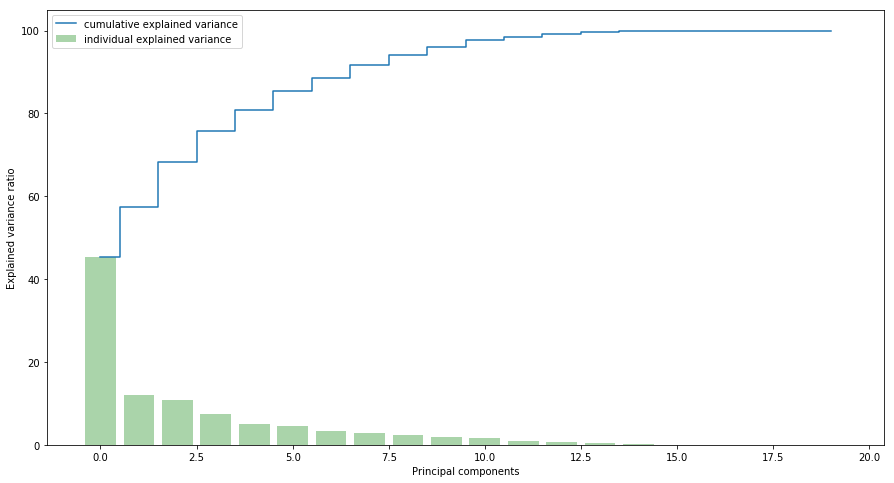

In [19]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERPOSED 
plt.figure(figsize=(15, 8))
plt.bar(range(20), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(20), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### Using 8 components for PCA

In [20]:
from sklearn.decomposition import PCA
# apply PCA to the normalized data
pca = PCA(n_components=8)
x_pca = pca.fit_transform(scale_data_df)

In [21]:
x_pca.shape

(2217, 8)

### Observing the original distribution of dataset

In [22]:
df_y_train['label']=df_y_train['label'].map({'male':0, 'female':1})

In [23]:
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 1 columns):
label    2217 non-null int64
dtypes: int64(1)
memory usage: 17.4 KB


In [24]:
len(x_pca)

2217

In [25]:
df_y_train.head()

,label
0,1
1,0
2,1
3,1
4,1


# Clustering

### KMeans

In [26]:
from sklearn import cluster
from sklearn import metrics
resultat = np.arange(15,dtype="double")
for i in np.arange(15):
    km=cluster.KMeans(n_clusters=i+2)
    km.fit(x_pca)
    resultat[i] = metrics.silhouette_score(x_pca,km.labels_)
    print(resultat)

[ 0.31312933  1.          2.          3.          4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.        ]
[ 0.31312933  0.31202936  2.          3.          4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.        ]
[ 0.31312933  0.31202936  0.23736029  3.          4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.        ]
[ 0.31312933  0.31202936  0.23736029  0.25870233  4.          5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.        ]
[ 0.31312933  0.31202936  0.23736029  0.25870233  0.2581665   5.
  6.          7.          8.          9.         10.         11.
 12.         13.         14.        ]
[ 0.31312933  0.31202936  0.23736029  0.25870233  0.2581665   0.24425194
  6.          7.          8.          9.         10.         11.
 12.         13.      

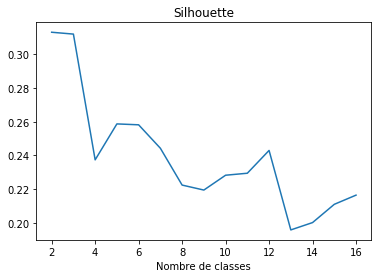

In [27]:
# Graphique nombre optimal de classe (Silhouette )
plt.title("Silhouette")
plt.xlabel("Nombre de classes")
plt.plot(np.arange(2,17,1),resultat)
plt.show()

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_pca)
y_kmeans = kmeans.predict(x_pca)

In [29]:
metrics.silhouette_score(x_pca,y_kmeans)

0.31312933049140285

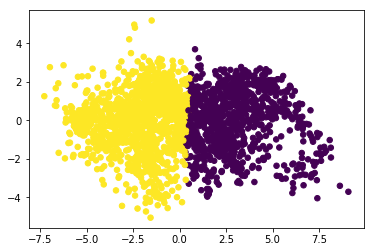

In [30]:
plt.scatter( x_pca[:,0], x_pca[:,1],  c=y_kmeans, s=30, cmap='viridis')